# Bayesian Optimization

In [1]:
import sys

sys.path.append("../")

In [2]:
import os

from settings import dev as settings
from src.scan import scan, scan_bayesian_optimization
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_meters_data, plot_motors_data, clear_output
from src.elegant import eleget, eleput
from src.core import config as cfg

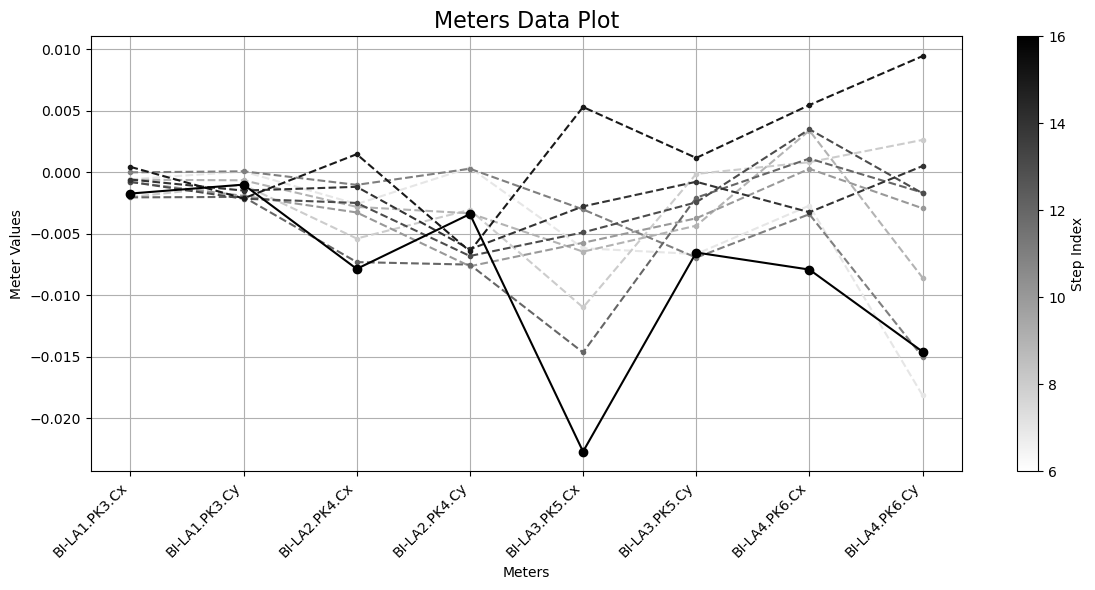

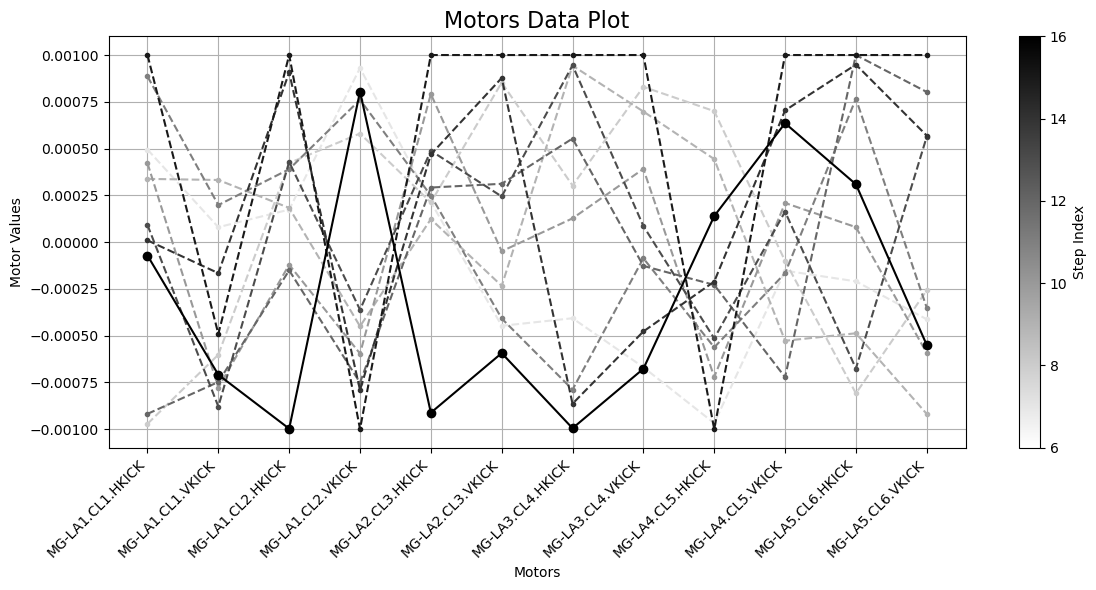

Set motor values:   0%|          | 0/12 [00:00<?, ?it/s]

Collect data:   0%|          | 0/12 [00:00<?, ?it/s]

Set motor values:   0%|          | 0/12 [00:00<?, ?it/s]

Collect data:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
data_scan = scan_bayesian_optimization(
    meters=settings.METERS, 
    motors=settings.MOTORS, 
    get_func=add_noise(settings.NOISE_LEVEL)(eleget), 
    put_func=eleput, 
    sample_size=settings.SAMPLE_SIZE,
    verify_motor=settings.VERIFY_MOTOR,
    max_retries=settings.MAX_TRIES,
    delay=settings.DELAY,
    tolerance=settings.TOLERANCE,
    save=settings.SAVE_SCAN,
    dirname=settings.DIRNAME_DATA,
    callback=[clear_output, plot_meters_data, plot_motors_data], 
    save_original_motor_values=settings.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=settings.PARALLEL,
)

In [ ]:
data_scan